In [1]:
from qiskit import QuantumCircuit,transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import plot_histogram
import numpy as np

In [2]:
simulator='ibmq_qasm_simulator'

In [3]:
index='110'
n=len(index)

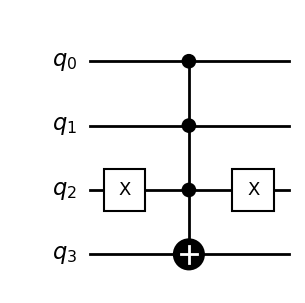

In [4]:
grover_oracle=QuantumCircuit(n+1,name='grover oracle')
grover_oracle.x([i for i,v in enumerate(index) if v=='0'])
grover_oracle.mcx(list(range(n)),n)
grover_oracle.x([i for i,v in enumerate(index) if v=='0'])
grover_oracle.to_gate()
grover_oracle.draw(output='mpl',style='bw')

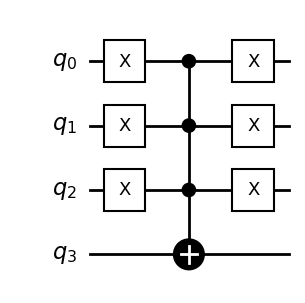

In [5]:
reflection_operator=QuantumCircuit(n+1,name='reflection operator')
reflection_operator.x(range(n))
reflection_operator.mcx(list(range(n)),n)
reflection_operator.x(range(n))
reflection_operator.to_gate()
reflection_operator.draw(output='mpl',style='bw')

In [6]:
r=int(np.floor(np.pi*np.sqrt(2**n)/4))
r

2

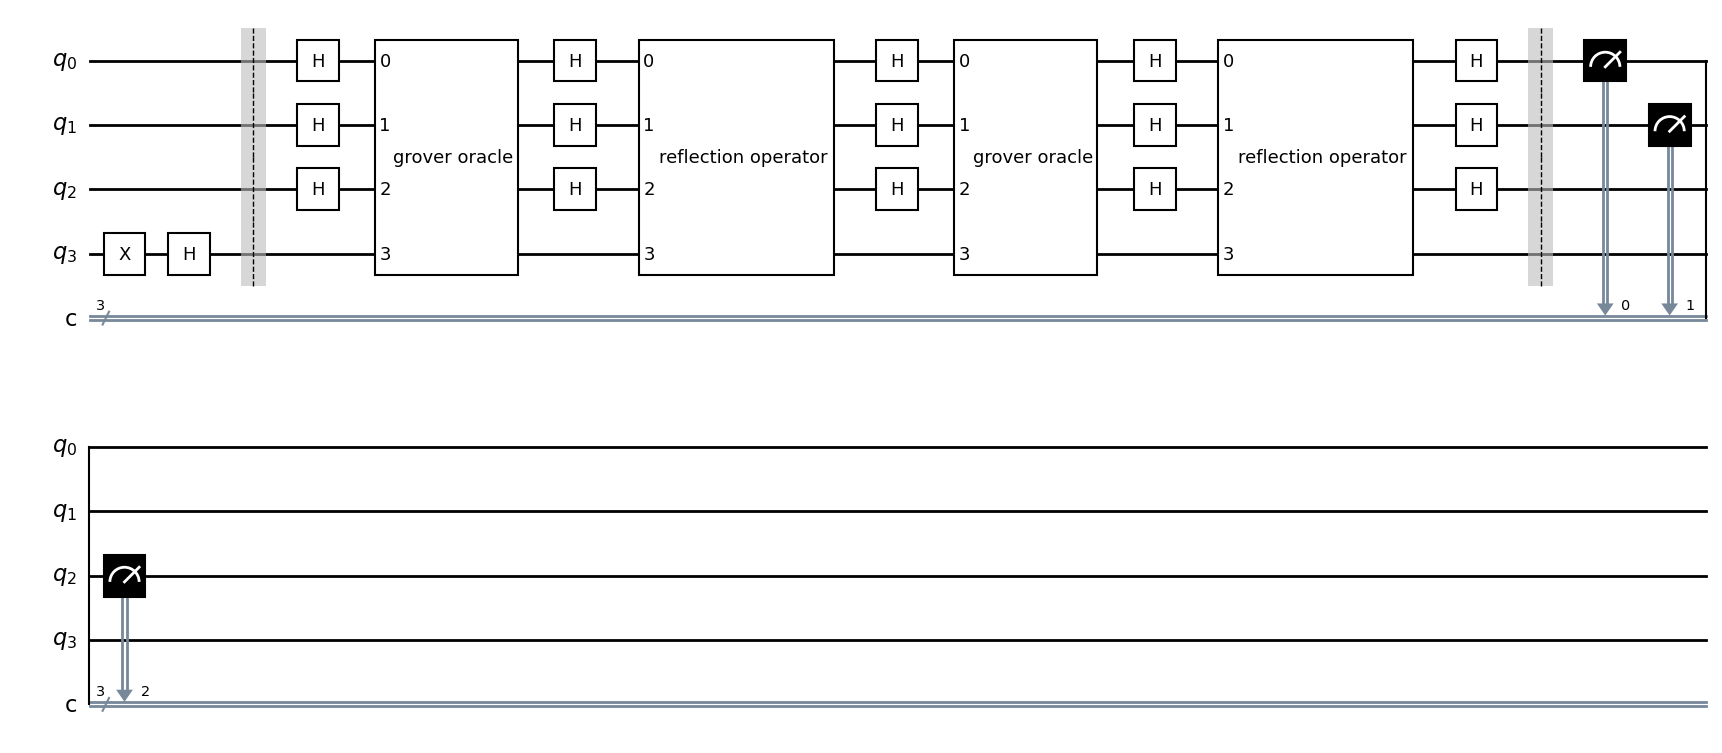

In [7]:
qc=QuantumCircuit(n+1,n)

#ancilia qubit
qc.x(n)
qc.h(n)
qc.barrier()
#hadmard transform
qc.h(range(n))
for _ in range(r):
    #apply grover oracle
    qc.append(grover_oracle,range(n+1))
    qc.h(range(n))
    #apply reflection operator
    qc.append(reflection_operator,range(n+1))
    qc.h(range(n))
qc.barrier()
qc.measure(range(n),range(n))

qc.draw(output='mpl',style='bw')

In [8]:
def execute(qc,simulator):
    provider=QiskitRuntimeService()
    backend=provider.get_backend(simulator)
    job=backend.run(transpile(qc,backend),shots=1024)
    result=job.result()
    return result.get_counts()

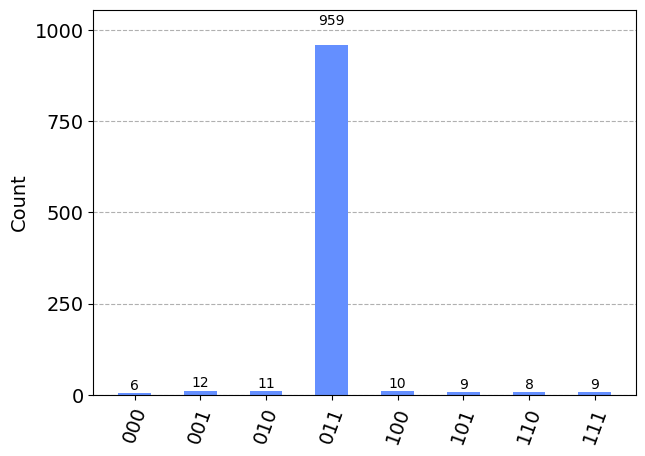

In [9]:
plot_histogram(execute(qc,simulator))